# Feature Engineering with Pandas - Practical Exercises

## Introduction
This notebook covers essential feature engineering techniques using pandas. We'll work through various exercises to understand how to create, transform, and select features for machine learning models.


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
## Exercise 1: Basic Data Loading and Exploration
# Let's create a sample dataset to work with
data = {
    'age': np.random.randint(18, 70, 1000),
    'income': np.random.normal(50000, 20000, 1000),
    'education_years': np.random.randint(8, 22, 1000),
    'job_category': np.random.choice(['tech', 'finance', 'healthcare', 'education'], 1000),
    'has_car': np.random.choice([0, 1], 1000),
    'purchase_amount': np.random.normal(500, 200, 1000)
}

df = pd.DataFrame(data)

# Display first few rows and basic information
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
   age        income  education_years job_category  has_car  purchase_amount
0   55  44827.804149               16   healthcare        1       521.987146
1   24  51429.820499                9      finance        0       759.498210
2   37  72697.483784               21         tech        0       570.075315
3   26  55918.090611               14    education        0       148.435908
4   66  64223.042123               20   healthcare        0       372.728244

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1000 non-null   int64  
 1   income           1000 non-null   float64
 2   education_years  1000 non-null   int64  
 3   job_category     1000 non-null   object 
 4   has_car          1000 non-null   int64  
 5   purchase_amount  1000 non-null   float64
dtypes: float64(2), i

## Exercise 2: Numerical Feature Engineering

### 2.1 Scaling and Normalization

In [21]:
# Standardize numerical features
numerical_cols = ['age', 'income', 'education_years']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


### 2.2 Binning

In [22]:
# Create age groups
df['age_group'] = pd.qcut(df['age'], q=4, labels=['Young', 'Young Adult', 'Adult', 'Senior'])


### 2.3 Feature Creation

In [23]:
# Create derived features
df['income_per_education'] = df['income'] / (df['education_years'] - 7)  # Subtract minimum education
df['high_income'] = (df['income'] > df['income'].mean()).astype(int)


## Exercise 3: Categorical Feature Engineering

### 3.1 One-Hot Encoding

In [24]:
# One-hot encode job category
job_dummies = pd.get_dummies(df['job_category'], prefix='job')
df = pd.concat([df, job_dummies], axis=1)



### 3.2 Label Encoding

In [25]:
# Label encode age groups
le = LabelEncoder()
df['age_group_encoded'] = le.fit_transform(df['age_group'])


### 3.3 Feature Interactions

In [26]:
# Create interaction features
df['tech_high_income'] = df['job_tech'] * df['high_income']
df['finance_education'] = df['job_finance'] * df['education_years']


## Exercise 4: Time-Based Feature Engineering

In [27]:
# Create sample datetime data
df['purchase_date'] = pd.date_range(start='2023-01-01', periods=1000, freq='H')

# Extract time-based features
df['purchase_hour'] = df['purchase_date'].dt.hour
df['purchase_day'] = df['purchase_date'].dt.day
df['purchase_month'] = df['purchase_date'].dt.month
df['is_weekend'] = df['purchase_date'].dt.weekday.isin([5, 6]).astype(int)

/var/folders/q4/pz4ygpt92_3_9nfh8mh5jkh40000gn/T/ipykernel_69645/321970157.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['purchase_date'] = pd.date_range(start='2023-01-01', periods=1000, freq='H')


## Exercise 5: Advanced Feature Engineering

### 5.1 Rolling Statistics

In [28]:
# Calculate rolling means for purchase amounts
df['rolling_avg_purchase'] = df['purchase_amount'].rolling(window=24, min_periods=1).mean()


### 5.2 Group-Based Features

In [29]:
# Calculate group statistics
group_stats = df.groupby('job_category').agg({
    'income': ['mean', 'std'],
    'purchase_amount': ['mean', 'max']
}).round(2)

print("\nGroup Statistics:")
print(group_stats)


Group Statistics:
             income       purchase_amount         
               mean   std            mean      max
job_category                                      
education      0.04  1.00          494.43  1026.13
finance        0.01  1.05          509.88  1304.45
healthcare    -0.06  1.00          486.86  1065.12
tech           0.02  0.95          490.62  1033.16


### 5.3 Polynomial Features

In [30]:
# Create polynomial features for income and education
df['income_squared'] = df['income'] ** 2
df['education_squared'] = df['education_years'] ** 2
df['income_education_interaction'] = df['income'] * df['education_years']


## Exercise 6: Feature Selection and Analysis

### 6.1 Correlation Analysis

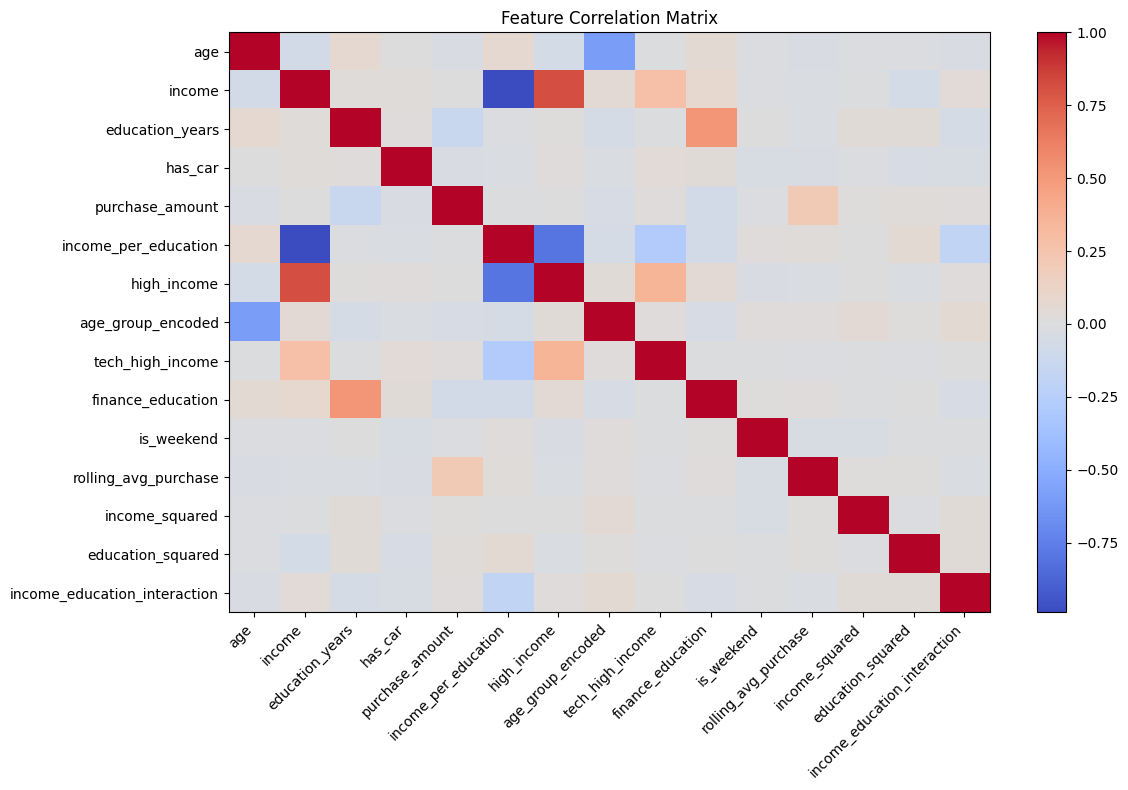

In [31]:
# Calculate correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

### 6.2 Basic Feature Importance

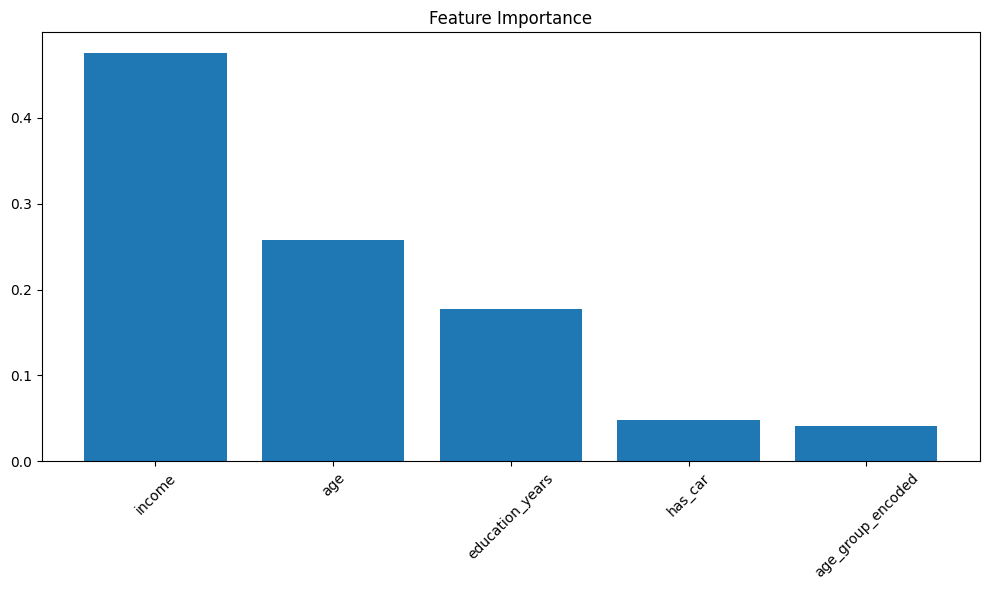

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Prepare features for importance analysis
X = df[['age', 'income', 'education_years', 'has_car', 'age_group_encoded']]
y = df['purchase_amount']

# Train a random forest to get feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exercise 7: Data Quality Checks and Cleaning

### 7.1 Missing Value Analysis

In [33]:
# Introduce some missing values
df.loc[np.random.choice(df.index, 50), 'income'] = np.nan
df.loc[np.random.choice(df.index, 30), 'education_years'] = np.nan

# Check missing values
print("\nMissing Value Analysis:")
print(df.isnull().sum())



Missing Value Analysis:
age                              0
income                          49
education_years                 30
job_category                     0
has_car                          0
purchase_amount                  0
age_group                        0
income_per_education             0
high_income                      0
job_education                    0
job_finance                      0
job_healthcare                   0
job_tech                         0
age_group_encoded                0
tech_high_income                 0
finance_education                0
purchase_date                    0
purchase_hour                    0
purchase_day                     0
purchase_month                   0
is_weekend                       0
rolling_avg_purchase             0
income_squared                   0
education_squared                0
income_education_interaction     0
dtype: int64


### 7.2 Handling Missing Values

In [34]:
# Fill missing values with appropriate strategies
df['income'].fillna(df['income'].mean(), inplace=True)
df['education_years'].fillna(df['education_years'].median(), inplace=True)


/var/folders/q4/pz4ygpt92_3_9nfh8mh5jkh40000gn/T/ipykernel_69645/2324852674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].mean(), inplace=True)
/var/folders/q4/pz4ygpt92_3_9nfh8mh5jkh40000gn/T/ipykernel_69645/2324852674.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

### 7.3 Outlier Detection and Treatment

In [35]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Detect outliers in purchase amount
purchase_outliers = detect_outliers(df, 'purchase_amount')
print("\nNumber of outliers in purchase amount:", len(purchase_outliers))


Number of outliers in purchase amount: 6


In [36]:
# Save the processed dataset
df.to_csv('processed_features.csv', index=False)
print("\nFeature engineering completed. Processed dataset saved.")


Feature engineering completed. Processed dataset saved.
